In [1]:
import pandas as pd
df = pd.read_csv("trazas_finales.csv", delimiter=',')

In [2]:
level_filtered = df[df['EventName'].str.contains('StartLevelEvent')]

levels_completed = len(level_filtered)

In [3]:
from collections import defaultdict

IDs_levels = defaultdict(list)
current_id = ''
for ind in level_filtered.index:
    a = str(level_filtered['Idpruebas'][ind])
    if a not in current_id:
        current_id = a
        IDs_levels[current_id] = 0
        
    IDs_levels[current_id] += 1 

In [13]:
casual = []
hardcore = []

casual_ids = [9, 7, 6, 4, 12]
hardcore_ids = [31,29,28,27,24,22,21,20,18,16]

for i in IDs_levels:
    if int(i)%2 == 0:
        if int(i) in casual_ids:
            casual.append(IDs_levels[i])
        elif int(i) in hardcore_ids:
            hardcore.append(IDs_levels[i])   

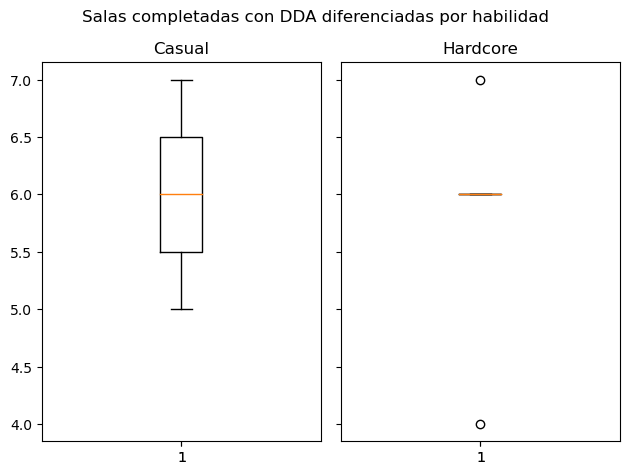

In [15]:
import matplotlib.pyplot as plt
import numpy as np

f, axs = plt.subplots(1, 2, sharey=True, sharex=True)
axs[0].boxplot(casual)
axs[0].set_title("Casual")

axs[1].boxplot(hardcore)
axs[1].set_title("Hardcore")

plt.tight_layout()

f.suptitle("Salas completadas con DDA diferenciadas por habilidad")
f.subplots_adjust(top=0.87)

plt.savefig("Resultados/Diferencias_Casual-Hardcore.pdf", format="pdf", bbox_inches="tight")

plt.show()